In [1]:
import random
class Maze_C():
    PATH = 0
    GOAL = 1
    WALL = 2

    def __init__(self, width, height):
        self.maze = []
        self.width = width
        self.height = height
        if(self.height < 5 or self.width < 5):
            print('at least 5')
            exit()
        if (self.width % 2) == 0:
            self.width += 1
        if (self.height % 2) == 0:
            self.height += 1
    def set_out_wall(self):
        for _x in range(0, self.width):
            row = []
            for _y in range(0, self.height):
                if (_x == 0 or _y == 0 or _x == self.width-1 or _y == self.height -1):
                    cell = self.WALL
                else:
                    cell = self.PATH
                row.append(cell)
            self.maze.append(row)
        return self.maze
    def set_inner_wall_boutaosi(self):
        
        for _x in range(2, self.width-1, 2):
            for _y in range(2, self.height-1, 2):
                self.maze[_x][_y] = self.WALL
              
                while True:
                    if _y == 2:
                        direction = random.randrange(0, 4)
                    else:
                        direction = random.randrange(0, 3)
                   
                    wall_x = _x
                    wall_y = _y
                    
                    if direction == 0:
                        wall_x += 1
                   
                    elif direction == 1:
                        wall_y += 1
                   
                    elif direction == 2:
                        wall_x -= 1
                   
                    else:
                        wall_y -= 1
                    
                    if self.maze[wall_x][wall_y] != self.WALL:
                        self.maze[wall_x][wall_y] = self.WALL
                        break
        return self.maze
    def set_start_goal(self):
        
 
        self.maze[1][1] = 1
        return self.maze
    

    
    def print_maze(self):
       
        for row in self.maze:
            for cell in row:
                if cell == self.PATH:
                    print('   ', end='')
                elif cell == self.WALL:
                    print('■■■', end='')
                elif cell == self.GOAL:
                    print(' G ', end='')

            print()
       
        
   

In [2]:
maze_C = Maze_C(10, 10)
maze_C.set_out_wall()
maze_C.set_inner_wall_boutaosi()
maze_C.set_start_goal()
maze_C.print_maze()

■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■
■■■ G       ■■■   ■■■   ■■■   ■■■
■■■■■■■■■   ■■■   ■■■   ■■■   ■■■
■■■                           ■■■
■■■   ■■■   ■■■   ■■■   ■■■■■■■■■
■■■   ■■■   ■■■   ■■■   ■■■   ■■■
■■■   ■■■■■■■■■   ■■■   ■■■   ■■■
■■■         ■■■   ■■■         ■■■
■■■   ■■■■■■■■■   ■■■■■■■■■■■■■■■
■■■         ■■■               ■■■
■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■■


In [3]:
maze=maze_C.maze
width=maze_C.width
print(maze)

[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [2, 1, 0, 0, 2, 0, 2, 0, 2, 0, 2], [2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2], [2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2], [2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2], [2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2], [2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2], [2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2], [2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]]


In [4]:
import copy
import numpy as np

class QAgent:

    def __init__(
            self,
            alpha=.2,
            epsilon=.1,
            gamma=.99,
            actions=None,
            observation=None):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.reward_history = []
        self.actions = actions
        self.state = str(observation)
        self.ini_state = str(observation)
        self.previous_state = None
        self.previous_action = None
        self.q_values = self._init_q_values()

    def _init_q_values(self):

        q_values = {}
        q_values[self.state] = np.repeat(0.0, len(self.actions))
        return q_values

    def init_state(self):

        self.previous_state = copy.deepcopy(self.ini_state)
        self.state = copy.deepcopy(self.ini_state)
        return self.state

    def act(self):
        
        if np.random.uniform() < self.epsilon:  
            action = np.random.randint(0, len(self.q_values[self.state]))
        else:  
            action = np.argmax(self.q_values[self.state])

        self.previous_action = action
        return action

    def observe(self, next_state, reward=None):
       
        next_state = str(next_state)
        if next_state not in self.q_values: 
            self.q_values[next_state] = np.repeat(0.0, len(self.actions))

        self.previous_state = copy.deepcopy(self.state)
        self.state = next_state

        if reward is not None:
            self.reward_history.append(reward)
            self.learn(reward)

    def learn(self, reward):
        
        q = self.q_values[self.previous_state][self.previous_action]  # Q(s, a)
        max_q = max(self.q_values[self.state])  # max Q(s')
        # Q(s, a) = Q(s, a) + alpha*(r+gamma*maxQ(s')-Q(s, a))
        self.q_values[self.previous_state][self.previous_action] = q + \
            (self.alpha * (reward + (self.gamma * max_q) - q))

In [7]:
import copy

class GridWorld:

    def __init__(self):

        self.map_type = {
            "N": 0,  
            "G": 1,  
            "W": 2,  
        }
        self.actions = {
            "UP": 0,
            "DOWN": 1,
            "LEFT": 2,
            "RIGHT": 3
        }
        self.map = maze_C.maze
        self.start_pos = 1, 10   
        self.pos = copy.deepcopy(self.start_pos)  

    def step(self, action):
        to_x, to_y = copy.deepcopy(self.pos)

        if self._is_possible_action(to_x, to_y, action) == False:
            return self.pos, -1, False

        if action == self.actions["UP"]:
            to_y += -1
        elif action == self.actions["DOWN"]:
            to_y += 1
        elif action == self.actions["LEFT"]:
            to_x += -1
        elif action == self.actions["RIGHT"]:
            to_x += 1

        is_goal = self.end(to_x, to_y) 
        reward = self._compute_reward(to_x, to_y)
        self.pos = to_x, to_y
        return self.pos, reward, is_goal

    def end(self, x, y):
        if self.map[y][x] == self.map_type["G"]: 
            print("goal.")
            return True
        else:
            return False

    def _is_wall(self, x, y):
        if self.map[y][x] == self.map_type["W"]:
            return True
        else:
            return False

    def _is_possible_action(self, x, y, action):
        to_x = x
        to_y = y

        if action == self.actions["UP"]:
            to_y += -1
        elif action == self.actions["DOWN"]:
            to_y += 1
        elif action == self.actions["LEFT"]:
            to_x += -1
        elif action == self.actions["RIGHT"]:
            to_x += 1

        if len(self.map) <= to_y or 0 > to_y:
            return False
        elif len(self.map[0]) <= to_x or 0 > to_x:
            return False
        elif self._is_wall(to_x, to_y):
            return False

        return True

    def _compute_reward(self, x, y):
        if self.map[y][x] == self.map_type["N"]:
            return 0
        elif self.map[y][x] == self.map_type["G"]:
            return 1000

    def reset(self):
        self.pos = self.start_pos
        return self.start_pos


goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal.
goal

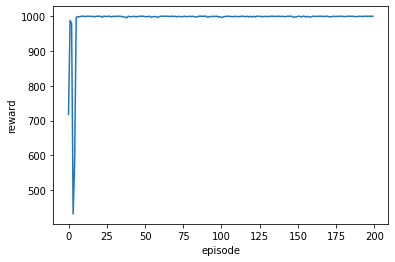

In [8]:
import numpy as np
import matplotlib.pyplot as plt



NB_EPISODE = 200    
EPSILON = .1    
ALPHA = .1      
GAMMA = .90     
ACTIONS = np.arange(4)  

if __name__ == '__main__':
    grid_env = GridWorld()  
    ini_state = grid_env.start_pos  
    agent = QAgent(
        alpha=ALPHA,
        gamma=GAMMA,
        epsilon=EPSILON,  
        actions=ACTIONS,   
        observation=ini_state)  
    rewards = []    
    is_end_episode = False  

    for episode in range(NB_EPISODE):
        episode_reward = []  
        while(is_end_episode == False):  
            action = agent.act()  
            state, reward, is_end_episode = grid_env.step(action)
            agent.observe(state, reward)   
            episode_reward.append(reward)
        rewards.append(np.sum(episode_reward))  
        state = grid_env.reset()  
        agent.observe(state)    
        is_end_episode = False

    plt.plot(np.arange(NB_EPISODE), rewards)
    plt.xlabel("episode")
    plt.ylabel("reward")
    plt.savefig("result.jpg")
    plt.show()